This notebook is part of the `nbsphinx` documentation: https://nbsphinx.readthedocs.io/.

# Code Cells

## Code, Output, Streams

An empty code cell:

Two empty lines:

Leading/trailing empty lines:

In [1]:


# 2 empty lines before, 1 after


A simple output:

In [2]:
6 * 7

42

The standard output stream:

In [3]:
print('Hello, world!')

Hello, world!


Normal output + standard output

In [4]:
print('Hello, world!')
6 * 7

Hello, world!


42

The standard error stream is highlighted and displayed just below the code cell.
The standard output stream comes afterwards (with no special highlighting).
Finally, the "normal" output is displayed.

In [5]:
import sys

print("I'll appear on the standard error stream", file=sys.stderr)
print("I'll appear on the standard output stream")
"I'm the 'normal' output"

I'll appear on the standard output stream


I'll appear on the standard error stream


"I'm the 'normal' output"

<div class="alert alert-info">

Note

Using the IPython kernel, the order is actually mixed up,
see https://github.com/ipython/ipykernel/issues/280.

</div>

## Cell Magics

IPython can handle code in other languages by means of [cell magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cell-magics):

In [6]:
%%bash
for i in 1 2 3
do
    echo $i
done

Couldn't find program: 'bash'


## Special Display Formats

See [IPython example notebook](https://nbviewer.jupyter.org/github/ipython/ipython/blob/master/examples/IPython Kernel/Rich Output.ipynb).

### Local Image Files

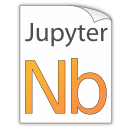

In [7]:
from IPython.display import Image
i = Image(filename='images/notebook_icon.png')
i

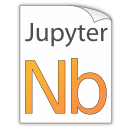

In [8]:
display(i)

In [9]:
from IPython.display import SVG
SVG(filename='images/python_logo.svg')

### Image URLs

In [10]:
Image(url='https://www.python.org/static/img/python-logo-large.png')

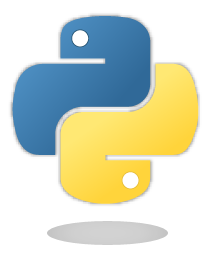

In [11]:
Image(url='https://www.python.org/static/img/python-logo-large.png', embed=True)

In [12]:
Image(url='https://jupyter.org/assets/nav_logo.svg')

### Math

In [13]:
from IPython.display import Math
eq = Math(r'\int\limits_{-\infty}^\infty f(x) \delta(x - x_0) dx = f(x_0)')
eq

<IPython.core.display.Math object>

In [14]:
display(eq)

<IPython.core.display.Math object>

In [15]:
from IPython.display import Latex
Latex(r'This is a \LaTeX{} equation: $a^2 + b^2 = c^2$')

<IPython.core.display.Latex object>

In [16]:
%%latex
\begin{equation}
\int\limits_{-\infty}^\infty f(x) \delta(x - x_0) dx = f(x_0)
\end{equation}

<IPython.core.display.Latex object>

### Plots

The output formats for Matplotlib plots can be customized.
You'll need separate settings for the Jupyter Notebook application and for `nbsphinx`.

If you want to use SVG images for Matplotlib plots,
add this line to your IPython configuration file:

```python
c.InlineBackend.figure_formats = {'svg'}
```

If you want SVG images, but also want nice plots when exporting to LaTeX/PDF, you can select:

```python
c.InlineBackend.figure_formats = {'svg', 'pdf'}
```

If you want to use the default PNG plots or HiDPI plots using `'png2x'` (a.k.a. `'retina'`),
make sure to set this:

```python
c.InlineBackend.rc = {'figure.dpi': 96}
```

This is needed because the default `'figure.dpi'` value of 72
is only valid for the [Qt Console](https://qtconsole.readthedocs.io/).

If you are planning to store your SVG plots as part of your notebooks,
you should also have a look at the `'svg.hashsalt'` setting.

For more details on these and other settings, have a look at
[Default Values for Matplotlib's "inline" Backend](https://nbviewer.jupyter.org/github/mgeier/python-audio/blob/master/plotting/matplotlib-inline-defaults.ipynb).

The configuration file `ipython_kernel_config.py` can be either
in the directory where your notebook is located
(see the [ipython_kernel_config.py](ipython_kernel_config.py) in this directory),
or in your profile directory
(typically `~/.ipython/profile_default/ipython_kernel_config.py`).
To find out your IPython profile directory, use this command:

    python3 -m IPython profile locate

A local `ipython_kernel_config.py` in the notebook directory
also works on https://mybinder.org/.
Alternatively, you can create a file with those settings in a file named
`.ipython/profile_default/ipython_kernel_config.py` in your repository.

To get SVG and PDF plots for `nbsphinx`,
use something like this in your `conf.py` file:

```python
nbsphinx_execute_arguments = [
    "--InlineBackend.figure_formats={'svg', 'pdf'}",
    "--InlineBackend.rc={'figure.dpi': 96}",
]
```
    
In the following example, `nbsphinx` should use an SVG image in the HTML output
and a PDF image for LaTeX/PDF output.

In [17]:
import matplotlib.pyplot as plt

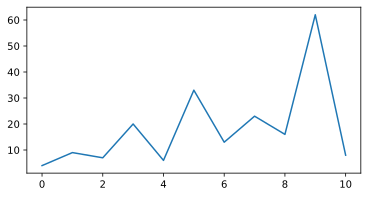

In [18]:
fig, ax = plt.subplots(figsize=[6, 3])
ax.plot([4, 9, 7, 20, 6, 33, 13, 23, 16, 62, 8]);

Alternatively, the figure format(s) can also be chosen directly in the notebook
(which overrides the setting in `nbsphinx_execute_arguments` and in the IPython configuration):

In [19]:
%config InlineBackend.figure_formats = ['png']

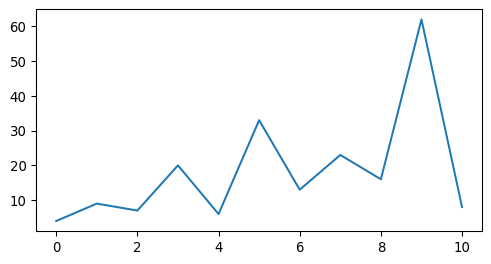

In [20]:
fig

If you want to use PNG images, but with HiDPI resolution,
use the special `'png2x'` (a.k.a. `'retina'`) format
(which also looks nice in the LaTeX output):

In [21]:
%config InlineBackend.figure_formats = ['png2x']

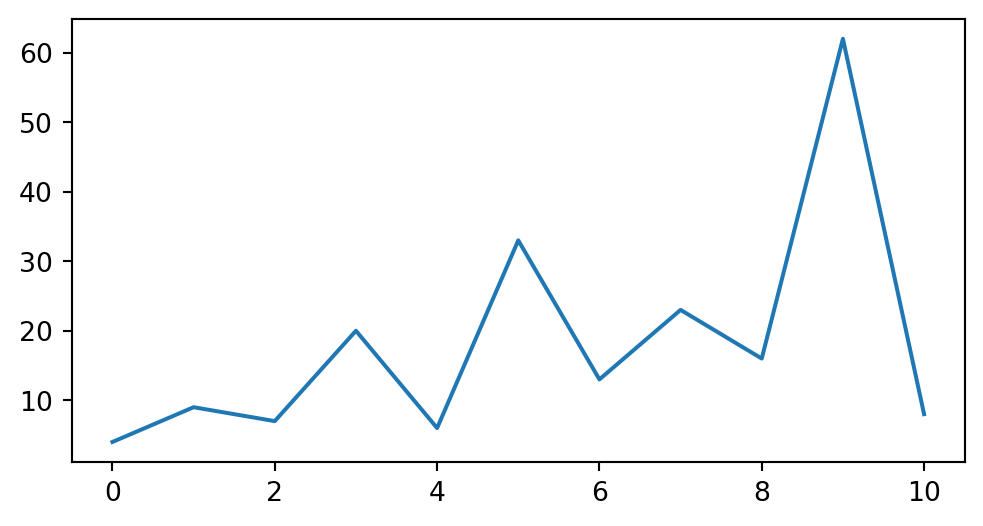

In [22]:
fig

### Pandas Dataframes

[Pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dataframe)
should be displayed as nicely formatted HTML tables (if you are using HTML output).

In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.DataFrame(np.random.randint(0, 100, size=[5, 4]),
                  columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,24,33,68,41
1,18,74,72,82
2,96,55,67,22
3,71,42,96,70
4,54,49,68,7


For LaTeX output, however, the plain text output is used by default.

To get nice LaTeX tables, a few settings have to be changed:

In [25]:
pd.set_option('display.latex.repr', True)

This is not enabled by default because of
[Pandas issue #12182](https://github.com/pandas-dev/pandas/issues/12182).

The generated LaTeX tables utilize the `booktabs` package, so you have to make sure that package is [loaded in the preamble](https://www.sphinx-doc.org/en/master/latex.html) with:

    \usepackage{booktabs}

In order to allow page breaks within tables, you should use:

In [26]:
pd.set_option('display.latex.longtable', True)

The `longtable` package is already used by Sphinx,
so you don't have to manually load it in the preamble.

Finally, if you want to use LaTeX math expressions in your dataframe, you'll have to disable escaping:

In [27]:
pd.set_option('display.latex.escape', False)

The above settings should have no influence on the HTML output, but the LaTeX output should now look nicer:

In [28]:
df = pd.DataFrame(np.random.randint(0, 100, size=[10, 4]),
                  columns=[r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$'])
df

,$\alpha$,$\beta$,$\gamma$,$\delta$
0,36,63,86,84
1,47,95,85,54
2,14,9,15,21
3,37,2,5,91
4,66,44,36,14
5,71,45,78,75
6,85,94,17,43
7,18,34,93,69
8,24,1,9,20
9,58,94,58,62
